In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

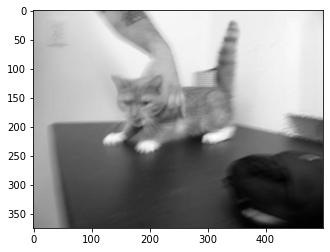

In [2]:
DATADIR = "D:/tensorflow/PetImages/train"
CATEGORIES = ["Cat","Dog"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #join path
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

In [3]:
print(img_array.shape)

(375, 500)


In [4]:
img

'0.jpg'

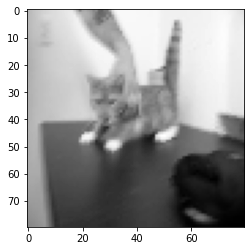

In [5]:
IMG_SIZE = 80
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

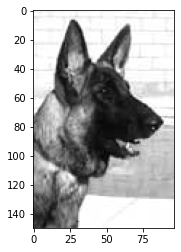

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) #join path
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path): 
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                plt.imshow(img_array, cmap="gray")
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()


In [7]:
print(len(training_data))

22961


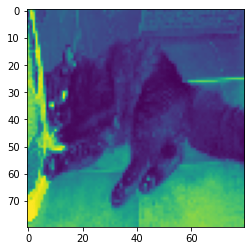

In [8]:
plt.imshow(training_data[10000][0])

In [10]:
training_data[0]

[array([[169, 174, 180, ..., 213, 210, 205],
        [169, 174, 180, ..., 214, 211, 207],
        [170, 175, 179, ..., 216, 214, 210],
        ...,
        [129, 132, 133, ...,   3,   3,   2],
        [127, 129, 131, ...,   3,   3,   2],
        [124, 128, 130, ...,   2,   2,   2]], dtype=uint8),
 0]

In [11]:
#need to shuffle the data as aal dta is now sorted by index 0 and 1 so if the model see first dog it will only preditt dog
# then when it goes to cat it will only predict cat
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
0
0
1
1
1
0


In [19]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
# X has to be an numpy array for evaluation

X = np.array(X).reshape(-1 , IMG_SIZE,IMG_SIZE , 1) # -1 is the lenght of the feature how many features do we have array negative indexing
                                                  # 1 means grayscale for rgb set it to 3


In [20]:
print(X[0])

[[[ 28]
  [ 26]
  [ 28]
  ...
  [  0]
  [  0]
  [  2]]

 [[ 26]
  [ 27]
  [ 26]
  ...
  [  9]
  [  2]
  [  0]]

 [[ 26]
  [ 26]
  [ 29]
  ...
  [  2]
  [  1]
  [  0]]

 ...

 [[231]
  [237]
  [237]
  ...
  [204]
  [176]
  [192]]

 [[232]
  [246]
  [245]
  ...
  [191]
  [184]
  [180]]

 [[227]
  [231]
  [248]
  ...
  [241]
  [207]
  [173]]]


In [21]:
X[0].shape

(80, 80, 1)

In [22]:
X.shape

(22961, 80, 80, 1)

In [23]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()



In [24]:
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [25]:
pickle_in = open("X.pickle","rb")
X  = pickle.load(pickle_in)


In [26]:
X[0]

array([[[ 28],
        [ 26],
        [ 28],
        ...,
        [  0],
        [  0],
        [  2]],

       [[ 26],
        [ 27],
        [ 26],
        ...,
        [  9],
        [  2],
        [  0]],

       [[ 26],
        [ 26],
        [ 29],
        ...,
        [  2],
        [  1],
        [  0]],

       ...,

       [[231],
        [237],
        [237],
        ...,
        [204],
        [176],
        [192]],

       [[232],
        [246],
        [245],
        ...,
        [191],
        [184],
        [180]],

       [[227],
        [231],
        [248],
        ...,
        [241],
        [207],
        [173]]], dtype=uint8)

In [1]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in  = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [12]:
X[0]

array([[[ 28],
        [ 26],
        [ 28],
        ...,
        [  0],
        [  0],
        [  2]],

       [[ 26],
        [ 27],
        [ 26],
        ...,
        [  9],
        [  2],
        [  0]],

       [[ 26],
        [ 26],
        [ 29],
        ...,
        [  2],
        [  1],
        [  0]],

       ...,

       [[231],
        [237],
        [237],
        ...,
        [204],
        [176],
        [192]],

       [[232],
        [246],
        [245],
        ...,
        [191],
        [184],
        [180]],

       [[227],
        [231],
        [248],
        ...,
        [241],
        [207],
        [173]]], dtype=uint8)

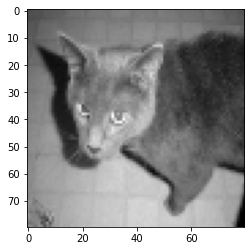

In [9]:
plt.imshow(X[3000] , cmap="gray")

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [3]:
# normalising the data the maximum value for pixel data is 255 so divide by that we can normalise it or use normalise module

X = X/255.0

In [4]:
import numpy as np

y = np.array(y)

In [5]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [6]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
                      #window shape       #to get the 80x80x1 shape of the X 1: will take everything as it is
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3)))
                      #window shape       #input shape not required here
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) #conv2d is 2d the output is 1d dense layer so to reduce it to 1d use flatten
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
646/646 [==============================] - 106s 163ms/step - loss: 0.6592 - accuracy: 0.6105 - val_loss: 0.6104 - val_accuracy: 0.6635
Epoch 2/5
646/646 [==============================] - 120s 186ms/step - loss: 0.5634 - accuracy: 0.7108 - val_loss: 0.5286 - val_accuracy: 0.7458
Epoch 3/5
646/646 [==============================] - 154s 238ms/step - loss: 0.4893 - accuracy: 0.7659 - val_loss: 0.5151 - val_accuracy: 0.7571
Epoch 4/5
646/646 [==============================] - 155s 239ms/step - loss: 0.4430 - accuracy: 0.7984 - val_loss: 0.4901 - val_accuracy: 0.7780
Epoch 5/5
646/646 [==============================] - 148s 229ms/step - loss: 0.4092 - accuracy: 0.8130 - val_loss: 0.4883 - val_accuracy: 0.7832


In [7]:
model.save('cat_dog_model.model')

INFO:tensorflow:Assets written to: cat_dog_model.model\assets


INFO:tensorflow:Assets written to: cat_dog_model.model\assets


In [3]:
#to test the model on new data

import cv2
import tensorflow as tf
import numpy as np

CATEGORIES = ["Cat","Dog"]

def prepare(filepath):
    IMG_SIZE = 80
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [4]:
model = tf.keras.models.load_model('cat_dog_model.model')

In [5]:
predict = model.predict([prepare('11554.jpg')]) #always pass the input in a list even if it is only one input
print(predict)

1/1 [==============================] - 0s 146ms/step
[[1.]]


In [7]:
predict = model.predict([prepare('11521.jpg')]) #always pass the input in a list even if it is only one input
print(predict)

1/1 [==============================] - 0s 21ms/step
[[0.7620521]]


In [10]:
predict = model.predict([prepare('11521.jpg')]) #always pass the input in a list even if it is only one input
print(int(predict[0][0]))

1/1 [==============================] - 0s 24ms/step
0


In [12]:
predict = model.predict([prepare('11521.jpg')]) #always pass the input in a list even if it is only one input
print(CATEGORIES[int(predict[0][0])])

1/1 [==============================] - 0s 18ms/step
Cat


In [22]:
import os
import matplotlib.pyplot as plt
"""for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #join path
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break """

"""try:
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    training_data.append([new_array,class_num])
except Exception as e:
    pass"""

datadir = "D:/tensorflow/PetImages/test/test_data"

for img in os.listdir(datadir):
    print(CATEGORIES[int(model.predict(prepare(img)))])
    
    


error: OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [24]:
11539
print(model.predict(prepare('11539.jpg')))
print(CATEGORIES[int(model.predict(prepare('11539.jpg')))])

1/1 [==============================] - 0s 40ms/step
[[1.]]
1/1 [==============================] - 0s 33ms/step
Dog


In [25]:
11602
print(model.predict(prepare('11602.jpg')))
print(CATEGORIES[int(model.predict(prepare('11602.jpg')))])

1/1 [==============================] - 0s 30ms/step
[[1.]]
1/1 [==============================] - 0s 39ms/step
Dog
